In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

country_profiles_file = "country_profile_variables.csv"


In [15]:
# loading csv file and putting into dataframe

country_data = pd.read_csv(country_profiles_file, header=0, na_values=['-99.0','...','NaN'])

country_data.dropna(axis=0,how='all')

country_data.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,38.2,135.0,0.8,145.4/3.7,5900.0,55.0,84.3/81.8,89.8/82.2,0.05,NaN
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,...,NaN,92.0,87.9,NaN,NaN,NaN,100.0/100.0,62.5/62.5,NaN,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,96.9,13.0,34.0,0.5/6.4,1.0,119.0,100.0/100.0,100.0/100.0,NaN,NaN


In [16]:
#Create health dataframe and clean up missing values
health_df = pd.DataFrame(country_data.loc[:,["country", "Region", "GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Health: Total expenditure (% of GDP)","Health: Physicians (per 1000 pop.)","Infant mortality rate (per 1000 live births","Life expectancy at birth (females/males, years)"]])
health_df.head()

health_df.dropna(axis=0, how='all')

health_df = health_df.set_index("country")
health_df.head()


,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Infant mortality rate (per 1000 live births,"Life expectancy at birth (females/males, years)"
country,,,,,,,
Afghanistan,SouthernAsia,20270.0,623.2,8.2,0.3,68.6,63.5/61.0
Albania,SouthernEurope,11541.0,3984.2,5.9,1.3,14.6,79.9/75.6
Algeria,NorthernAfrica,164779.0,4154.1,7.2,NaN,27.7,76.5/74.1
American Samoa,Polynesia,NaN,NaN,NaN,NaN,9.6,77.8/71.1
Andorra,SouthernEurope,2812.0,39896.4,8.1,3.7,NaN,NaN


In [17]:
health_df["Health: Physicians (per 1000 pop.)"].describe()


count     124
unique     47
top       0.2
freq        9
Name: Health: Physicians (per 1000 pop.), dtype: object

In [18]:
health_df.Region.unique()

array(['SouthernAsia', 'SouthernEurope', 'NorthernAfrica', 'Polynesia',
       'MiddleAfrica', 'Caribbean', 'SouthAmerica', 'WesternAsia',
       'Oceania', 'WesternEurope', 'EasternEurope', 'CentralAmerica',
       'WesternAfrica', 'NorthernAmerica', 'SouthernAfrica',
       'South-easternAsia', 'EasternAfrica', 'NorthernEurope',
       'EasternAsia', 'Melanesia', 'Micronesia', 'CentralAsia'],
      dtype=object)

In [19]:
#Rename columns
    
health_df = health_df.rename(columns={"Health: Physicians (per 1000 pop.)": "Physicians for every one thousand people"})
health_df = health_df.rename(columns={"country": "Country"})
health_df = health_df.rename(columns={"Health: Total expenditure (% of GDP)": "Total % of GDP spent on Healthcare"})
health_df = health_df.rename(columns={"GDP: Gross domestic product (million current US$)": "Total GDP in US$"})
health_df = health_df.rename(columns={"GDP per capita (current US$)": "GDP per person in US$"})
health_df.head()

,Region,Total GDP in US$,GDP per person in US$,Total % of GDP spent on Healthcare,Physicians for every one thousand people,Infant mortality rate (per 1000 live births,"Life expectancy at birth (females/males, years)"
country,,,,,,,
Afghanistan,SouthernAsia,20270.0,623.2,8.2,0.3,68.6,63.5/61.0
Albania,SouthernEurope,11541.0,3984.2,5.9,1.3,14.6,79.9/75.6
Algeria,NorthernAfrica,164779.0,4154.1,7.2,NaN,27.7,76.5/74.1
American Samoa,Polynesia,NaN,NaN,NaN,NaN,9.6,77.8/71.1
Andorra,SouthernEurope,2812.0,39896.4,8.1,3.7,NaN,NaN


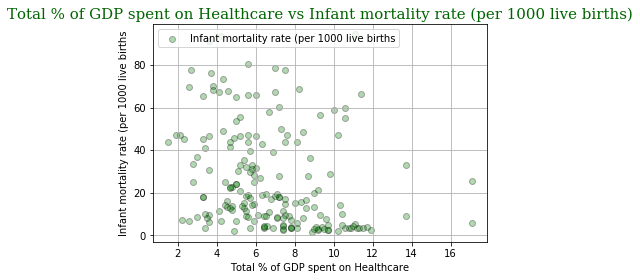

<Figure size 432x288 with 0 Axes>

In [20]:
#graph % of GDP spent on healthcare vs infant mortality rate (per 1000 live births)
plt.scatter(health_df["Total % of GDP spent on Healthcare"], 
            health_df["Infant mortality rate (per 1000 live births"], 
            marker = "o", color = "green", 
            edgecolor = "black", 
            alpha = .3)

font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }

plt.title("Total % of GDP spent on Healthcare vs Infant mortality rate (per 1000 live births)",fontdict=font)
plt.ylabel("Infant mortality rate (per 1000 live births")
plt.xlabel("Total % of GDP spent on Healthcare")
plt.grid(True)
plt.legend(loc=2)
plt.show()
plt.savefig('Health')

In [21]:
#GDP: Gross domestic product (million current US$), 
#GDP per capita (current US$)
#GDP growth rate (annual %, const. 2005 prices)

# Health: Total Expenditure (% of GDP)
# Health: Physicians (per 1000 pop.)

# Education: Government Expenditure (% of GDP)
# Education: Primary gross enrol. ratio (f/m per 100 pop)
# Education: Secondary gross enrol. ratio (f/m per 100 pop)
# Education: Tertiary gross enrol. ratio (f/m per 100 pop)

# Hypothesis
# Null Hyposthesis

In [9]:
#Create an education dataframe and clean up missing values
education_df = pd.DataFrame(country_data.loc[:,["country", "Region", "GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Education: Government Expenditure (% of GDP)","Education: Primary gross enrol. ratio (f/m per 100 pop)","Education: Secondary gross enrol. ratio (f/m per 100 pop)","Education: Tertiary gross enrol. ratio (f/m per 100 pop)"]])
education_df.head()



C:\Users\lhartlaub\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,country,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Education: Government Expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop),Education: Secondary gross enrol. ratio (f/m per 100 pop),Education: Tertiary gross enrol. ratio (f/m per 100 pop)
0,Afghanistan,SouthernAsia,20270.0,623.2,NaN,NaN,NaN,NaN
1,Albania,SouthernEurope,11541.0,3984.2,NaN,NaN,NaN,NaN
2,Algeria,NorthernAfrica,164779.0,4154.1,NaN,NaN,NaN,NaN
3,American Samoa,Polynesia,0.0,0.0,NaN,NaN,NaN,NaN
4,Andorra,SouthernEurope,2812.0,39896.4,NaN,NaN,NaN,NaN


In [10]:
#rename column names
education_df = education_df.rename(columns={"Education: Government Expenditure (% of GDP)": "Total % of GDP spent on Education"})
education_df = education_df.rename(columns={"GDP: Gross domestic product (million current US$)": "Total GDP in US$"})
education_df = education_df.rename(columns={"GDP per capita (current US$)": "GDP per person in US$"})
education_df = education_df.rename(columns={"country": "Country"})
education_df = education_df.rename(columns={"Education: Primary gross enrol. ratio (f/m per 100 pop)": "Female/Male ratio for 100 persons enrolled in Elementary School"})
education_df = education_df.rename(columns={"Education: Secondary gross enrol. ratio (f/m per 100 pop)": "Female/Male ratio for 100 persons enrolled in Middle and High School"})
education_df = education_df.rename(columns={"Education: Tertiary gross enrol. ratio (f/m per 100 pop)": "Female/Male ratio for 100 persons enrolled in Higher Education"})



education_df.head()


,Country,Region,Total GDP in US$,GDP per person in US$,Total % of GDP spent on Education,Female/Male ratio for 100 persons enrolled in Elementary School,Female/Male ratio for 100 persons enrolled in Middle and High School,Female/Male ratio for 100 persons enrolled in Higher Education
0,Afghanistan,SouthernAsia,20270.0,623.2,NaN,NaN,NaN,NaN
1,Albania,SouthernEurope,11541.0,3984.2,NaN,NaN,NaN,NaN
2,Algeria,NorthernAfrica,164779.0,4154.1,NaN,NaN,NaN,NaN
3,American Samoa,Polynesia,0.0,0.0,NaN,NaN,NaN,NaN
4,Andorra,SouthernEurope,2812.0,39896.4,NaN,NaN,NaN,NaN


In [11]:
#convert ratio into an integer





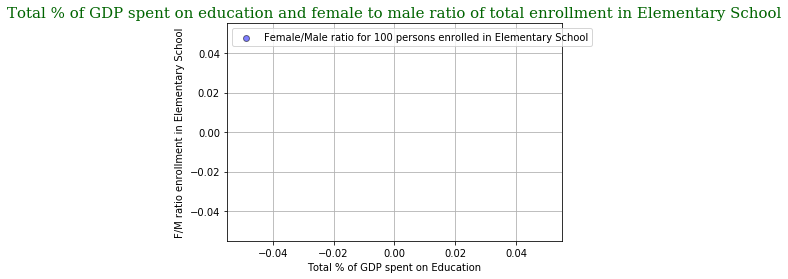

<Figure size 432x288 with 0 Axes>

In [25]:
#graph education graphs based on type of school 
plt.scatter(education_df["Total % of GDP spent on Education"], 
            education_df["Female/Male ratio for 100 persons enrolled in Elementary School"], 
            marker = "o", color = "blue", 
            edgecolor = "black", 
            alpha = 0.5)

font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }

plt.title("Total % of GDP spent on education and female to male ratio of total enrollment in Elementary School",fontdict=font)
plt.ylabel("F/M ratio enrollment in Elementary School")
plt.xlabel("Total % of GDP spent on Education")
plt.grid(True)
plt.legend(loc=2)
plt.show()
plt.savefig('Education')




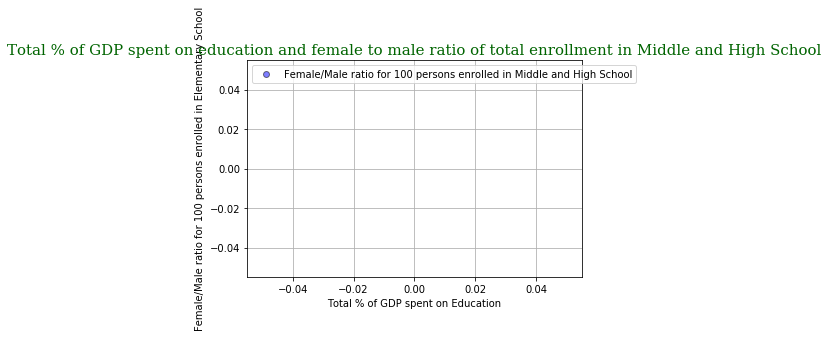

<Figure size 432x288 with 0 Axes>

In [22]:
#graph education graphs based on type of school 
plt.scatter(education_df["Total % of GDP spent on Education"], 
            education_df["Female/Male ratio for 100 persons enrolled in Middle and High School"], 
            marker = "o", color = "blue", 
            edgecolor = "black", 
            alpha = 0.5)

font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }

plt.title("Total % of GDP spent on education and female to male ratio of total enrollment in Middle and High School",fontdict=font)
plt.ylabel("F/M ratio enrollment in Middle and High School")
plt.xlabel("Total % of GDP spent on Education")
plt.grid(True)
plt.legend(loc=2)
plt.show()
plt.savefig('Education')


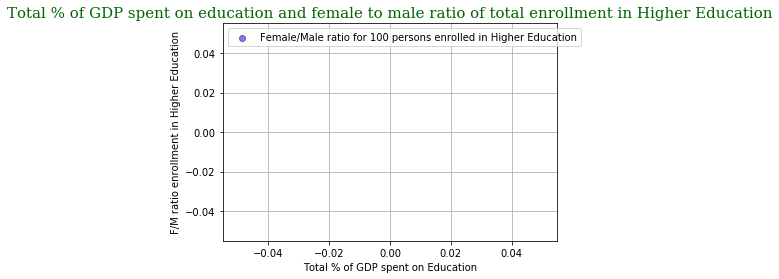

<Figure size 432x288 with 0 Axes>

In [26]:
#graph education graphs based on type of school 
plt.scatter(education_df["Total % of GDP spent on Education"], 
            education_df["Female/Male ratio for 100 persons enrolled in Higher Education"], 
            marker = "o", color = "blue", 
            edgecolor = "black", 
            alpha = 0.5)

font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }

plt.title("Total % of GDP spent on education and female to male ratio of total enrollment in Higher Education",fontdict=font)
plt.ylabel("F/M ratio enrollment in Higher Education")
plt.xlabel("Total % of GDP spent on Education")
plt.grid(True)
plt.legend(loc=2)
plt.show()
plt.savefig('Education')